## Name Classification Model
We want to feature engineer a new feature to determine which names are men and women. Using this we want to segment the data and look for homogeneity in our NYC Salary Data Set.

We will use NLTK to help with classifying full names into either man or woman. The dataset we will use is from https://www.ssa.gov/oact/babynames/limits.html, we will specifically be looking at NY State Names since we will be using this classifier to identify the gender of people working in NYC. As well as to limit the amount of time to train our model.

In [30]:
import numpy as np
import pandas as pd
import seaborn as sns


In [31]:
df = pd.read_csv("NY.TXT", header = None)
df.columns = ["State", "Sex", "Year", "Name", "Count"]
df

,State,Sex,Year,Name,Count
0,NY,F,1910,Mary,1923
1,NY,F,1910,Helen,1290
2,NY,F,1910,Rose,990
3,NY,F,1910,Anna,951
4,NY,F,1910,Margaret,926
...,...,...,...,...,...
305015,NY,M,2020,Zac,5
305016,NY,M,2020,Zach,5
305017,NY,M,2020,Zacharias,5
305018,NY,M,2020,Zayvion,5


In [32]:
# Dropping columns that are not useful for us
df = df.drop(columns=["State", "Year", "Count"])
df = df.reindex(columns=["Name", "Sex"])

In [35]:
df['First Letter'] = [i[0] for i in df['Name']]
df['Last Letter'] = [i[-1] for i in df['Name']]
df['Length'] = [len(i) for i in df['Name']]

df

,Name,Sex,First Letter,Last Letter,Length
0,Mary,F,M,y,4
1,Helen,F,H,n,5
2,Rose,F,R,e,4
3,Anna,F,A,a,4
4,Margaret,F,M,t,8
...,...,...,...,...,...
305015,Zac,M,Z,c,3
305016,Zach,M,Z,h,4
305017,Zacharias,M,Z,s,9
305018,Zayvion,M,Z,n,7


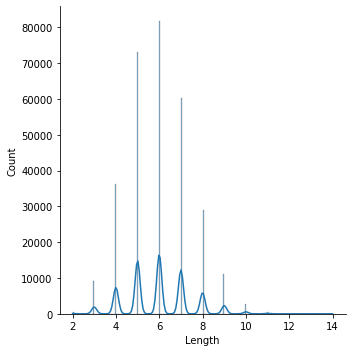

In [52]:
# Distribution of the length of the names
sns.displot(data=df["Length"], kde=True)